In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def get_differential_filter(im):
    # To do
    kernel_x = np.tile(np.array([1,0,-1]),(3,1))
    kernel_y = np.tile(np.vstack(np.array([1,0,-1])),3)
    im = im.astype('float') / 255.0
    im_zero_pad = np.pad(im, ((1,1),(1,1)), 'constant')
    #print(kernel_y)
    filter_x = np.zeros(im.shape)
    filter_y = np.zeros(im.shape)
    
    height,width = im_zero_pad.shape
    
    
    for i in range(1,height-1,1):
        for j in range(1,width-1,1):
            cell = np.array([[im_zero_pad[i-1,j-1],im_zero_pad[i-1,j],im_zero_pad[i-1,j+1]],
                            [im_zero_pad[i,j-1],im_zero_pad[i,j],im_zero_pad[i,j+1]],
                            [im_zero_pad[i+1,j-1],im_zero_pad[i+1,j],im_zero_pad[i+1,j+1]]])
        
            
            filter_x[i-1,j-1] = np.sum(cell*kernel_x)
            filter_y[i-1,j-1] = np.sum(cell*kernel_y)
    
    
    return filter_x, filter_y

In [37]:
im = cv2.imread('einstein.jpg', 0)
filter_x, filter_y = get_differential_filter(im)

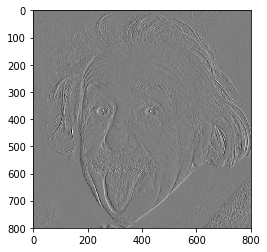

In [38]:
plt.imshow(filter_x,cmap='gray')
plt.show()

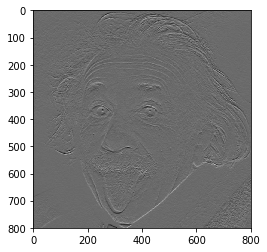

In [40]:
plt.imshow(filter_y,cmap='gray')
plt.show()

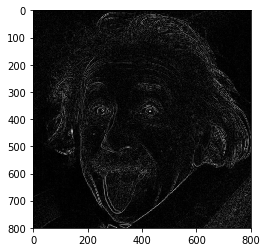

In [43]:
grad_mag = np.sqrt(filter_x*filter_x+filter_y*filter_y)

plt.imshow(grad_mag,cmap='gray')
plt.show()

nan


/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/mac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arctan
  """Entry point for launching an IPython kernel.


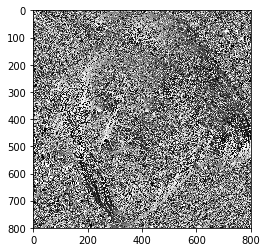

In [55]:
grad_angle = np.arctan(filter_x/filter_y)
print(np.max(grad_angle))
plt.imshow(grad_angle,cmap='gray')
plt.show()

In [ ]:
im = cv2.imread('einstein.jpg', 0)
kernel_x = np.tile(np.array([1,0,-1]),(3,1))
kernel_y = np.tile(np.vstack(np.array([1,0,-1])),3)
im = im.astype('float') / 255.0
im_zero_pad = np.pad(im, ((1,1),(1,1)), 'constant')
#print(kernel_y)
filter_x = np.zeros(im.shape)
filter_y = np.zeros(im.shape)

height,width = im_zero_pad.shape


for i in range(1,height-1,1):
    for j in range(1,width-1,1):
        cell = np.array([[im_zero_pad[i-1,j-1],im_zero_pad[i-1,j],im_zero_pad[i-1,j+1]],
                        [im_zero_pad[i,j-1],im_zero_pad[i,j],im_zero_pad[i,j+1]],
                        [im_zero_pad[i+1,j-1],im_zero_pad[i+1,j],im_zero_pad[i+1,j+1]]])
        
        
        filter_x[i-1,j-1] = np.sum(cell*kernel_x)
        filter_y[i-1,j-1] = np.sum(cell*kernel_y)

In [28]:
print(cell*kernel_x)
print(np.sum(cell*kernel_x))
print(kernel_x)
print(cell)


[[ 0.          0.         -0.        ]
 [ 0.          0.         -0.20392157]
 [ 0.          0.         -0.21568627]]
-0.4196078431372549
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[0.         0.         0.        ]
 [0.         0.2        0.20392157]
 [0.         0.21568627 0.21568627]]


In [20]:
print(cell)
a = np.array([1,2,3,4,5,6,7])
a[1:4]

[[0.         0.         0.        ]
 [0.         0.2        0.20392157]
 [0.         0.21568627 0.21568627]]


array([2, 3, 4])